# House Price Prediction

In [86]:
#Generic Libraries

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model 
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier




# Data Set
from sklearn.datasets import fetch_california_housing

In [81]:
# Get the Data 

data = fetch_california_housing()

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
df = pd.DataFrame()

In [5]:
data.data.shape

(20640, 8)

In [6]:
#Independent Data
df = pd.DataFrame(data = data.data , columns = data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df['Target'] = data.target

In [8]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
#Dependent Data

df['Target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## EDA

In [11]:
!pip install sweetviz

In [12]:
import sweetviz as sv

# Assuming 'df' is your DataFrame
report = sv.analyze(df)
report.show_html('./report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Data Pre-Processing

In [14]:
## Feature Engineering
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent='geoapiExercises')


In [79]:
df.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.0,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,1.0,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,0.0,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,1.0,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,1.0,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,1.0,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,1.0,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,1.0,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [22]:
df.fillna(df.mean(), inplace=True)

<Axes: >

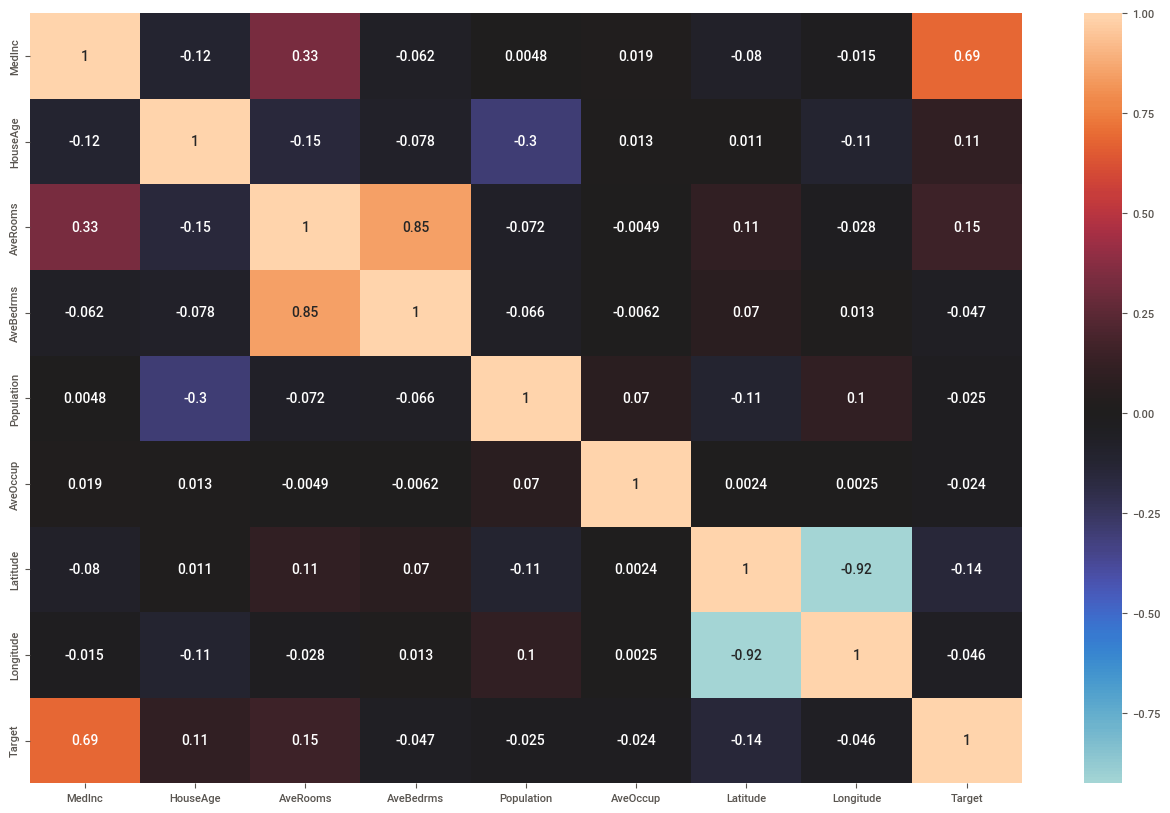

In [23]:
#initial Correlation
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot=True,center=0 )

## Worst Model

In [24]:
wm_df = df.copy()
wm_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [25]:
scaler = MinMaxScaler()
column_names_to_normalize = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target']
x = wm_df[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = wm_df.index)
wm_df[column_names_to_normalize] = df_temp

In [26]:
#worst model
wm_data = wm_df.copy()
wmY = wm_data['Longitude']
wm_data.drop(columns=['Latitude', 'Longitude'],inplace=True)
wmX_train, wmX_test, wmy_train, wmy_test = train_test_split(wm_data, wmY, test_size=0.2, random_state=1)
wm_data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Target'],
      dtype='object')

In [27]:
model = linear_model.LinearRegression()
model.fit(wmX_train, wmy_train)

LinearRegression()

In [28]:
wmy_pred = model.predict(wmX_test)

## Exploring Data

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

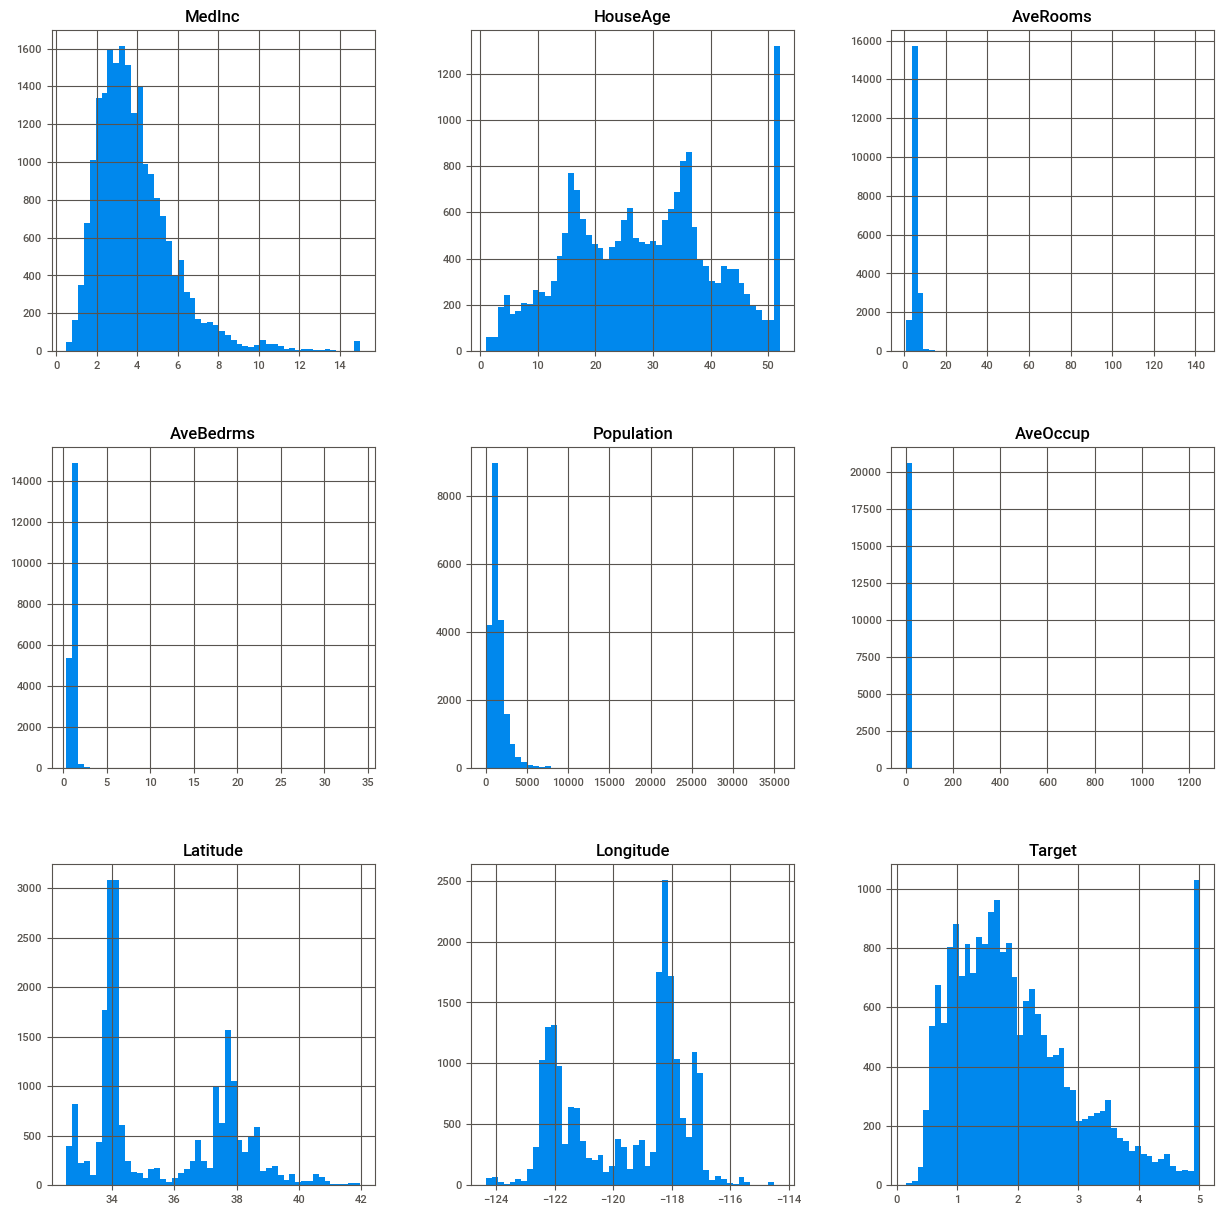

In [29]:
df.hist(bins=50, figsize=(15, 15))

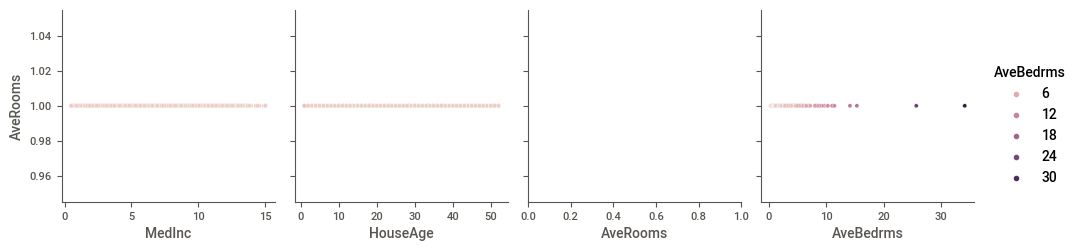

In [82]:
sns.pairplot(df, x_vars=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms'],y_vars ='AveRooms',hue = 'AveBedrms')

In [31]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [32]:
df['AveRooms'].value_counts()

AveRooms
5.000000    27
4.500000    22
4.000000    21
6.000000    20
5.333333    13
            ..
3.532286     1
4.793919     1
4.964602     1
4.539088     1
5.254717     1
Name: count, Length: 19392, dtype: int64

<Axes: xlabel='HouseAge'>

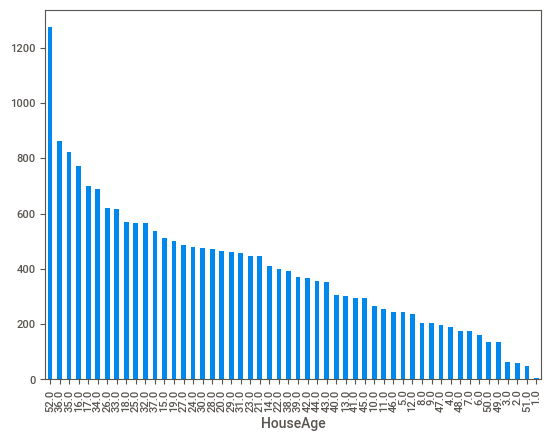

In [33]:
df['HouseAge'].value_counts().plot(kind='bar')

<Axes: xlabel='MedInc', ylabel='Population'>

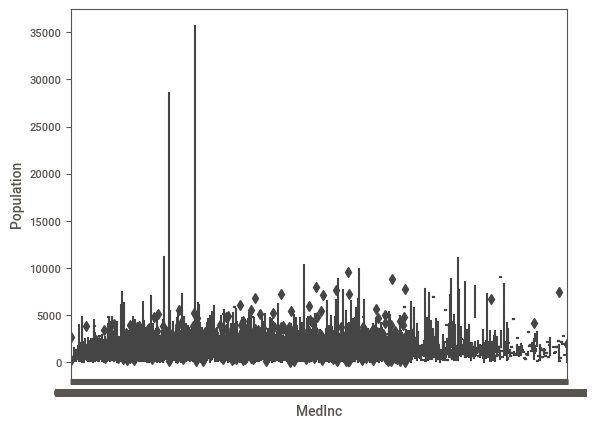

In [34]:
sns.boxplot(x="MedInc", y="Population", data= df)

<Axes: xlabel='Population', ylabel='HouseAge'>

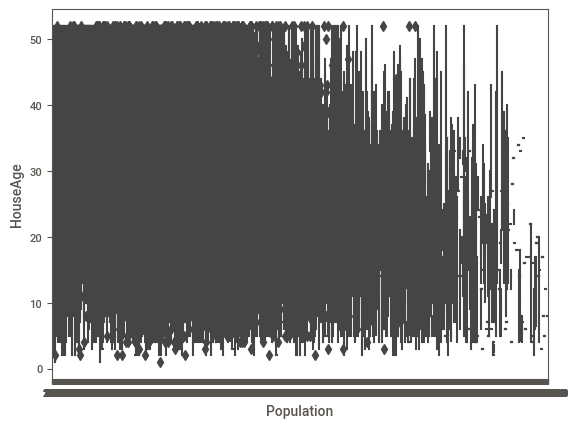

In [35]:
sns.boxplot(x="Population", y="HouseAge", data=df)

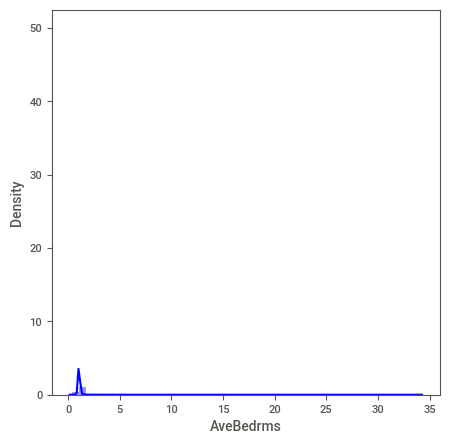

In [83]:
plt.figure(figsize=(5,5))
sns.distplot(df['AveRooms'],color='red')
sns.distplot(df['AveBedrms'],color='blue')
plt.show()

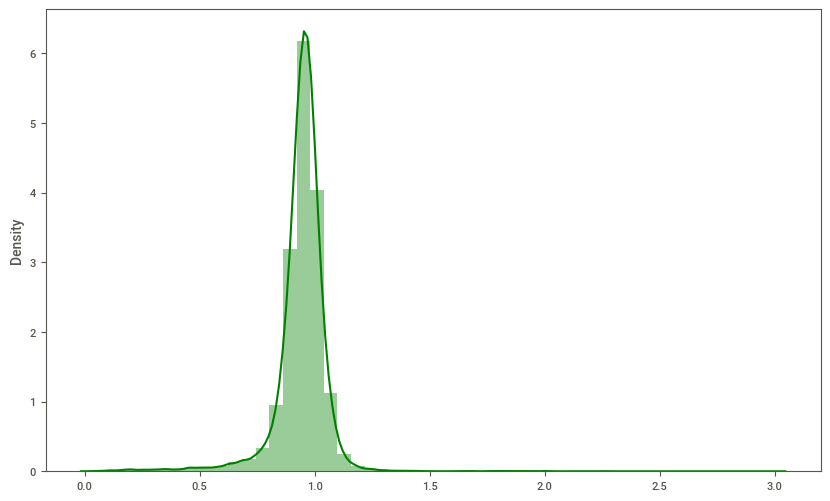

In [85]:
plt.figure(figsize=(10,6))
sns.distplot((df['AveRooms']/df['AveBedrms']),color='green')
plt.show()

In [38]:
df['AveRooms'] = (df['AveRooms']/
                  df['AveRooms'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [40]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

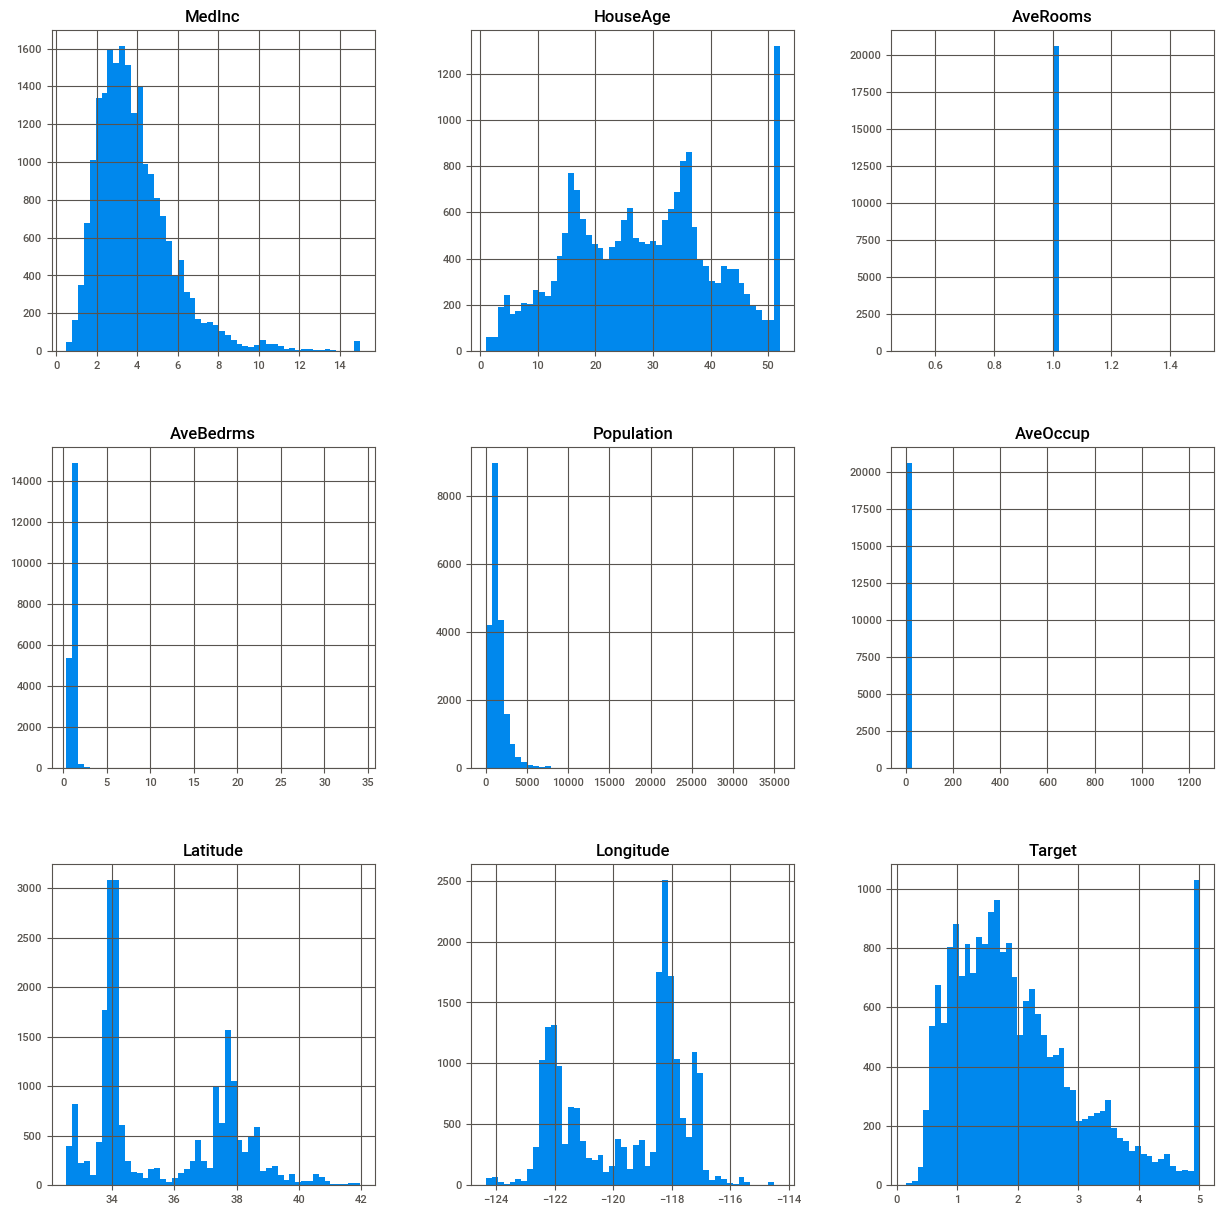

In [41]:
df.hist(bins=50, figsize=(15, 15))

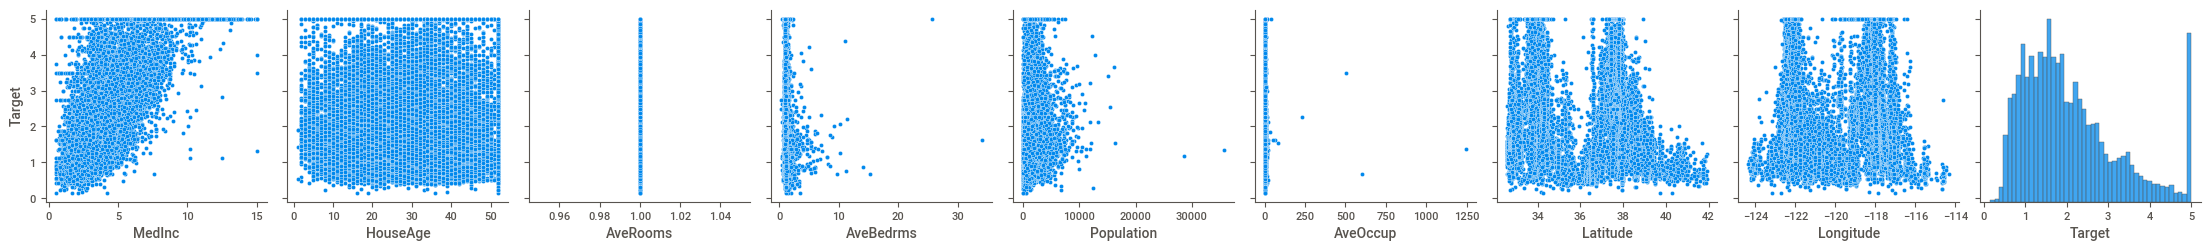

In [84]:
sns.pairplot(df, x_vars=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],y_vars ='Target')

# Ploting Geographical Map

In [43]:
BBox = (df.Longitude.min(),   df.Longitude.max(),      
         df.Latitude.min(), df.Latitude.max())

In [44]:
BBox

(-124.35, -114.31, 32.54, 41.95)

(32.54, 41.95)

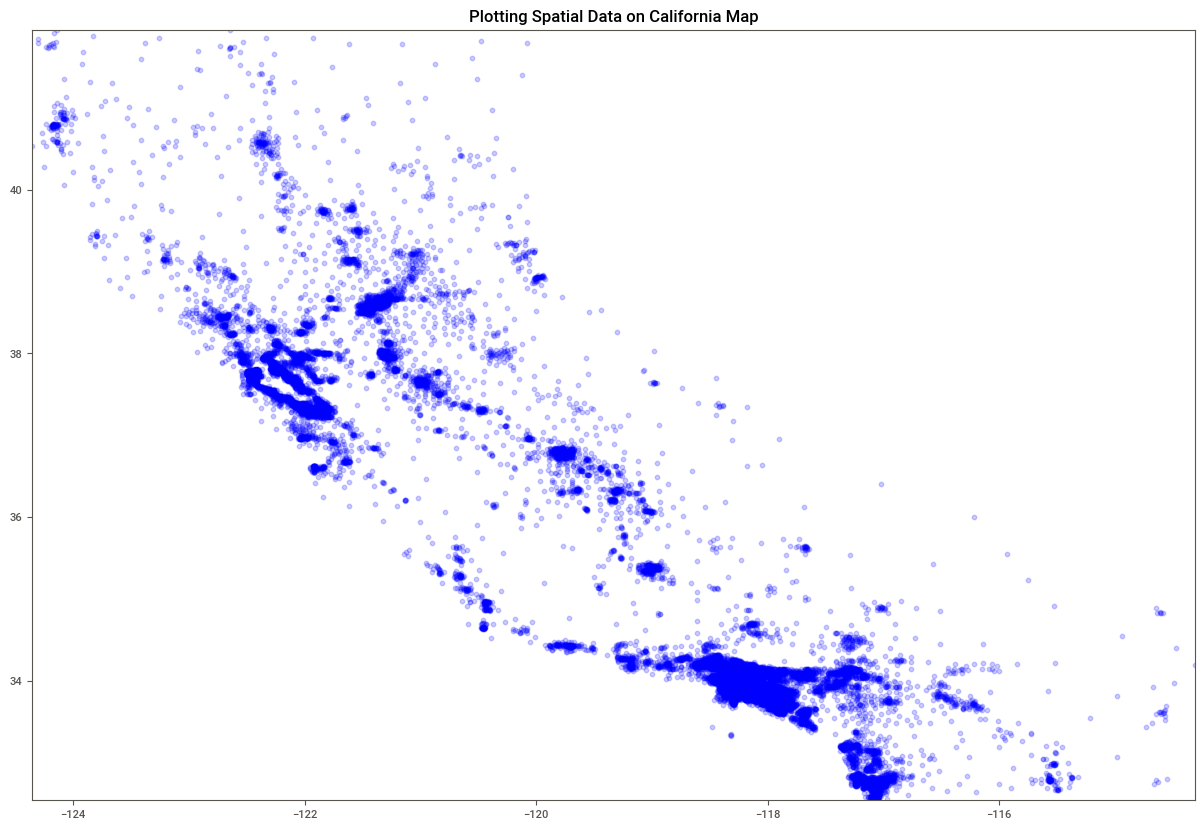

In [45]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(df.Longitude, df.Latitude, zorder=1, alpha= 0.2, c='blue', s=10)
ax.set_title('Plotting Spatial Data on California Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

In [46]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,1.0,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,1.0,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,1.0,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,1.0,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,1.0,1.081081,565.0,2.181467,37.85,-122.25,3.422


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

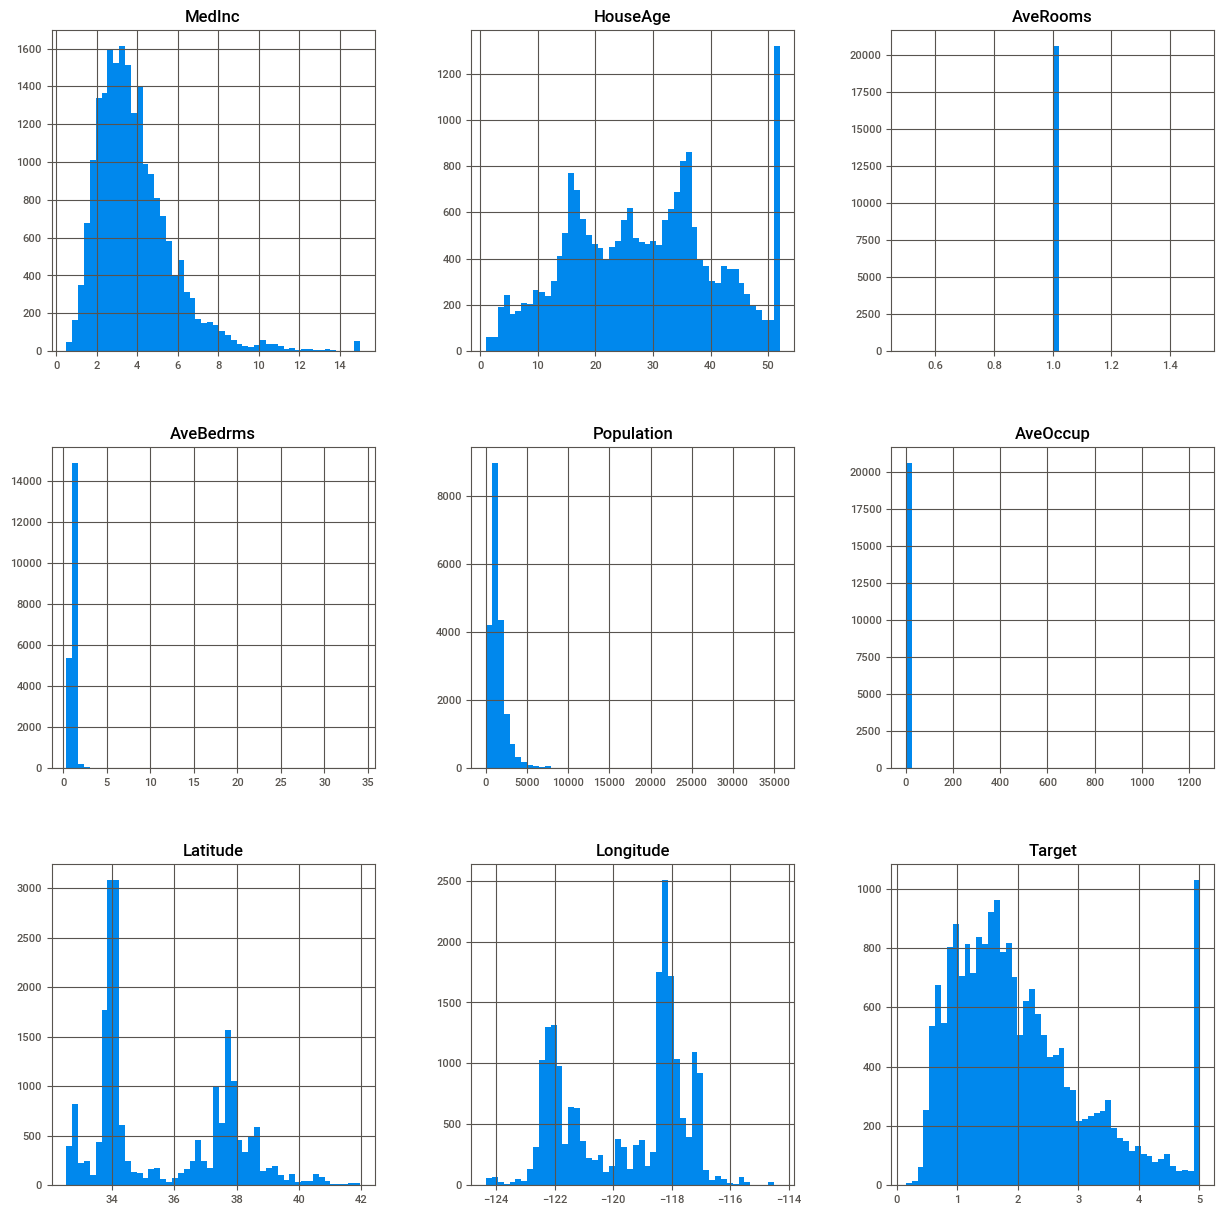

In [47]:
df.hist(bins=50,figsize=(15, 15))

In [48]:
#test model 1
m1_data = df.copy()
m1Y = m1_data['MedInc']
m2_data = df.copy()
m2_data.drop(columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'Latitude', 'Longitude', 'Target'],inplace=True)
m1_data.drop(columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'Latitude', 'Longitude', 'Target'],inplace=True)
m1_data.columns

Index(['AveOccup'], dtype='object')

In [49]:
m1X_train, m1X_test, m1y_train, m1y_test = train_test_split(m1_data, m1Y, test_size=0.2,random_state=1)

In [50]:
model1 = linear_model.LinearRegression()
model1.fit(m1X_train, m1y_train)

LinearRegression()

In [51]:
m1y_pred = model1.predict(m1X_test)
# m1y_pred_train = model1.predict(m1X_train)

In [52]:
pd.DataFrame(zip(m1_data.columns,model1.coef_))

,0,1
0,AveOccup,0.003688


In [53]:
pd.DataFrame(zip(m1y_test,m1y_pred),columns=['True','Predicted'])

,True,Predicted
0,3.2500,3.871290
1,1.9784,3.874359
2,4.0132,3.878669
3,1.5208,3.873213
4,5.1795,3.874001
...,...,...
4123,2.3173,3.876028
4124,2.1875,3.872111
4125,5.0480,3.878257
4126,4.8750,3.875934


In [54]:
model1.score(m1X_train, m1y_train)

0.0005111748676922545

# Linear Regression

In [58]:
dic

{'LinearRegression': (1.9327160965071433, -0.05003255313092647)}

In [57]:
dic = {}  # Initialize the dictionary

model_lr = make_pipeline(preprocessing.StandardScaler(), linear_model.LinearRegression())
scores = cross_val_score(model_lr, m1X_train, m1y_train, cv=10)

model_lr.fit(m1X_train, m1y_train)
pred = model_lr.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['LinearRegression'] = (RMSE, scores.mean() * 100)

print(MSE, RMSE)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2))


3.735391509697809 1.9327160965071433
Accuracy: -0.05 (+/- 0.00)


# Random Forrest

In [59]:
# Model with max_depth = 2

model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=2, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)
model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)
MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_2'] = (RMSE,scores.mean() *100)
print("Depth:2 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))


# Model with max_depth = 5

model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=5, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)
model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_5'] = (RMSE,scores.mean() *100)

print("Depth:5 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))


# Model with max_depth = 10

model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=10, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)

model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_10'] = (RMSE,scores.mean() *100)

print("Depth:10 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))


# Model with max_depth = 20

model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=20, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)

model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_20'] = (RMSE,scores.mean() *100)

print("Depth:20 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))



# Model with max_depth = 50

model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=50, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)

model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_50'] = (RMSE,scores.mean() *100)

print("Depth:50 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

Depth:2 Accuracy: 5.27 (+/- 0.02)
Depth:5 Accuracy: 5.54 (+/- 0.02)
Depth:10 Accuracy: 3.46 (+/- 0.04)
Depth:20 Accuracy: -7.40 (+/- 0.05)
Depth:50 Accuracy: -36.59 (+/- 0.10)


In [60]:
test = model_rf.fit(m1X_train, m1y_train)

In [61]:
pred = test.predict(m1X_test)

In [62]:
print(np.sqrt(metrics.mean_squared_error(m1y_test, pred)))

2.2100617154019635


In [63]:
result = pd.DataFrame(zip(m1y_test,pred),columns=['True','Predicted'])

In [64]:
result

,True,Predicted
0,3.2500,2.831433
1,1.9784,2.732979
2,4.0132,6.161105
3,1.5208,5.771211
4,5.1795,2.804965
...,...,...
4123,2.3173,4.500232
4124,2.1875,3.252221
4125,5.0480,2.846455
4126,4.8750,4.248367


In [65]:
accuracy_model = pd.DataFrame(dic,index=['RMSE','Training_Accuracy'])
accuracy_model = accuracy_model.T
accuracy_model

,RMSE,Training_Accuracy
LinearRegression,1.932716,-0.050033
RFD_2,1.873569,5.273528
RFD_5,1.871390,5.539546
RFD_10,1.880313,3.463406
RFD_20,1.957210,-7.400599
RFD_50,2.210062,-36.591120


In [66]:
accuracy_model.sort_values(by=['RMSE'],inplace=True)

<Axes: ylabel='RMSE'>

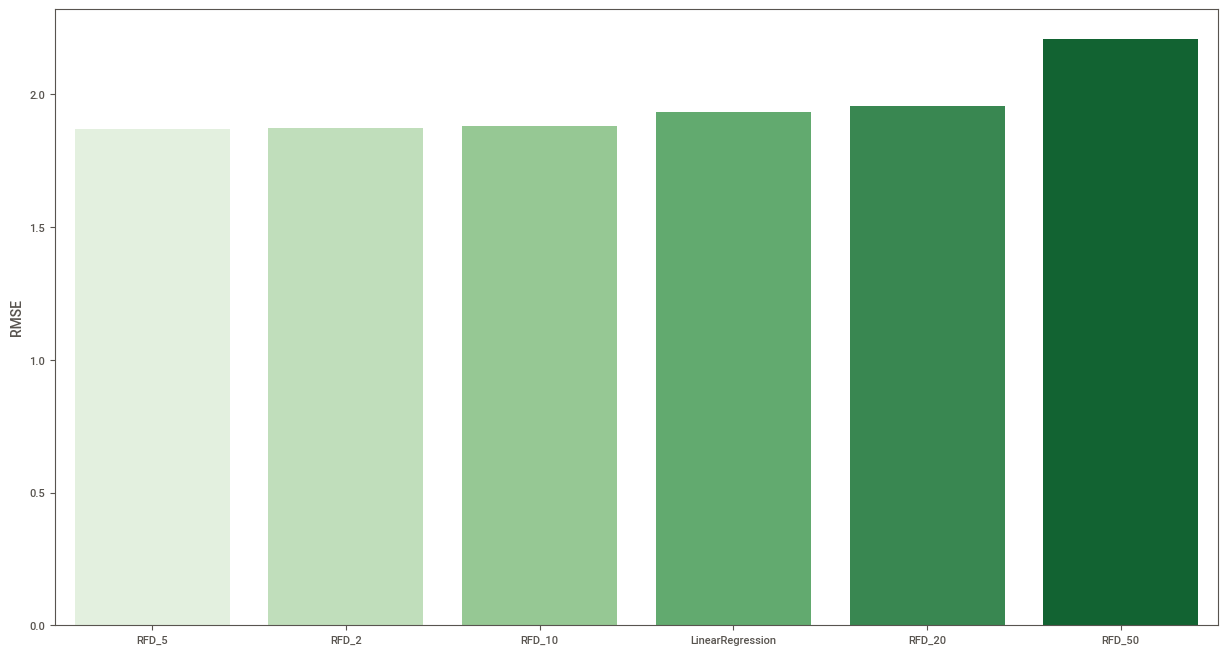

In [67]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x=accuracy_model.index,y='RMSE',data=accuracy_model,ax=ax,palette='Greens')



In [68]:
accuracy_model.sort_values(by=['Training_Accuracy'],inplace=True)

<Axes: ylabel='Training_Accuracy'>

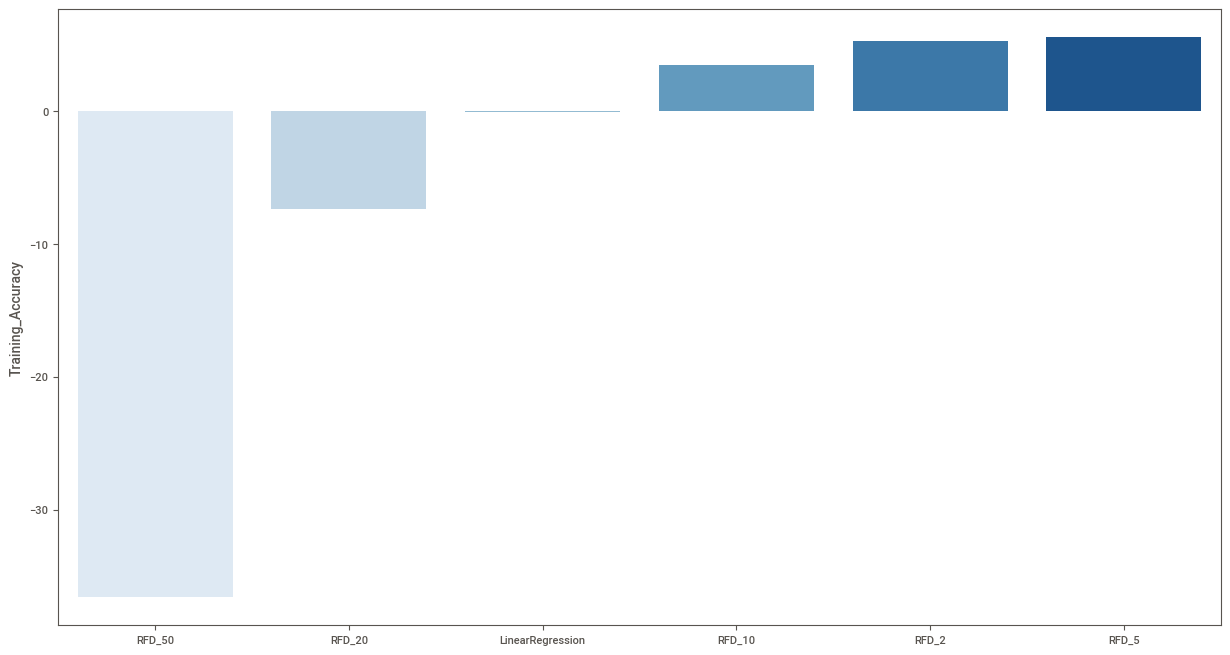

In [69]:
fig1, ax1 = pyplot.subplots(figsize=(15,8))
sns.barplot(x=accuracy_model.index,y='Training_Accuracy',data=accuracy_model,ax=ax1,palette='Blues')

In [73]:
# Model with LinearSVR
model_svr = make_pipeline(preprocessing.StandardScaler(), LinearSVR(dual='auto', max_iter=10000))  # Set dual='auto' to suppress FutureWarning
scores = cross_val_score(model_svr, m1X_train, m1y_train, cv=10)
model_svr.fit(m1X_train, m1y_train)
pred = model_svr.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['LinearSVR'] = (RMSE, scores.mean() * 100)
print("LinearSVR Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2))

LinearSVR Accuracy: -3.11 (+/- 0.01)
